<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 3: Practical - Multi-Layer Perceptron (VAE) <br>
<font color=696880 size=4>
    Sobhan Moghimi (sobhanmoghimi45@gmail.com) <br>
    Fakhredin Abdi (fakhredinabdi80@gmail.com) <br>
    
____


### Full Name : Alireza Sabounchi
### Student Number : 401212454

# Description

**In this assignment you'll be working with Dorothea Dataset.**

DOROTHEA is a drug discovery dataset. Chemical compounds represented by structural molecular features must be classified as active (binding to thrombin) or inactive.
To find out more about dataset, refer to this link: https://archive.ics.uci.edu/ml/datasets/Dorothea

You should implement a classifier with Neural Networks and for this purpose we will be using PyTorch as framework.

# Importing libraries, modules and Dataset.

In this part, import all the libraries and modules needed to solve the problem.

In [1]:
import os
import random
import torch
import torch.nn as nn
import numpy as np
from scipy.sparse import coo_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
torch.manual_seed(42)

Now import the train and test data from dataset.

In [2]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from google.colab import files

# Mount the Drive where the data file is located
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the data
with open('/content/drive/MyDrive/dorothea_train.data') as file:
  lines = file.readlines()

# parse the lines to get the features
features = []
for line in lines:
  features.append([int(x) for x in line.split()])

# create the numpy matrix
num_samples = len(features)
max_feature = 100000
train = np.zeros((num_samples, max_feature))

for i in range(num_samples):
  for j in features[i]:
    train[i, j-1] = 1

print(train.shape)

(800, 100000)


In [4]:
with open('/content/drive/MyDrive/dorothea_train.labels') as file:
  lines = file.readlines()

# Convert each label to an integer and store in a list
labels = [(int(line.strip())+1)/2 for line in lines]
# Convert the list of labels to a PyTorch tensor
train_labels = torch.tensor(labels)
print(train_labels.shape)
print(min(train_labels))

torch.Size([800])
tensor(0.)


In [5]:
with open('/content/drive/MyDrive/dorothea_valid.data') as file:
  lines = file.readlines()

# parse the lines to get the features
features = []
for line in lines:
  features.append([int(x) for x in line.split()])

# create the numpy matrix
num_samples = len(features)
max_feature = 100000
validation = np.zeros((num_samples, max_feature))

for i in range(num_samples):
  for j in features[i]:
    validation[i, j-1] = 1

print(validation.shape)

(350, 100000)


In [6]:
with open('/content/drive/MyDrive/dorothea_valid.labels') as file:
  lines = file.readlines()

# Convert each label to an integer and store in a list
labels = [(int(line.strip())+1)/2 for line in lines]
labels[labels==-1] = 0
# Convert the list of labels to a PyTorch tensor
validation_labels = torch.tensor(labels)
print(validation_labels.shape)

torch.Size([350])


## Normalize
You can normalize your data using <code>Scikit-Learn</code> modules here.

In [7]:
# Normalize data using StandardScaler from scikit-learn
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
validation = scaler.fit_transform(validation)
print(train.shape)

(800, 100000)


## Dimensionality Reduction
There are too many attributes for each instance of dataset. We will suffer from sparse data and long training phase. Thus you can reduce dimensions to get better accuracy.

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data.

Apply PCA on Dorothea dataSet using <code>Scikit-Learn</code>.

In [8]:
# Apply PCA to the data
pca = PCA(n_components=250)
train_pca = pca.fit_transform(train)
validation_pca = pca.transform(validation)
print(train_pca.shape, validation_pca.shape)

(800, 250) (350, 250)


# Define Model



In [9]:
# Define your model in here
# You can change the code below.

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters
input_size = 250
hidden_size = 50
num_epochs = 150
batch_size = 32
learning_rate = 0.001

# Define the model
model = MLP(input_size, hidden_size)

# Loss and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([15]))
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model

**Initialize model, define hyperparameters, optimizer, loss function, etc.**



In [10]:
# Implement Train in here
loss_values = []
# Train the model
for epoch in range(num_epochs):
  # Forward pass
  outputs = model(torch.Tensor(train_pca)).squeeze()
  loss = criterion(outputs, train_labels)

  # Backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  loss_values.append(loss.item())
  print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/150], Loss: 1.7022
Epoch [2/150], Loss: 1.6297
Epoch [3/150], Loss: 1.5637
Epoch [4/150], Loss: 1.5032
Epoch [5/150], Loss: 1.4481
Epoch [6/150], Loss: 1.3976
Epoch [7/150], Loss: 1.3513
Epoch [8/150], Loss: 1.3091
Epoch [9/150], Loss: 1.2699
Epoch [10/150], Loss: 1.2333
Epoch [11/150], Loss: 1.1991
Epoch [12/150], Loss: 1.1669
Epoch [13/150], Loss: 1.1365
Epoch [14/150], Loss: 1.1076
Epoch [15/150], Loss: 1.0802
Epoch [16/150], Loss: 1.0540
Epoch [17/150], Loss: 1.0289
Epoch [18/150], Loss: 1.0049
Epoch [19/150], Loss: 0.9819
Epoch [20/150], Loss: 0.9599
Epoch [21/150], Loss: 0.9388
Epoch [22/150], Loss: 0.9184
Epoch [23/150], Loss: 0.8987
Epoch [24/150], Loss: 0.8797
Epoch [25/150], Loss: 0.8613
Epoch [26/150], Loss: 0.8435
Epoch [27/150], Loss: 0.8262
Epoch [28/150], Loss: 0.8095
Epoch [29/150], Loss: 0.7933
Epoch [30/150], Loss: 0.7775
Epoch [31/150], Loss: 0.7621
Epoch [32/150], Loss: 0.7472
Epoch [33/150], Loss: 0.7326
Epoch [34/150], Loss: 0.7184
Epoch [35/150], Loss: 0

**After the training process, plot metrics such as loss function values.**

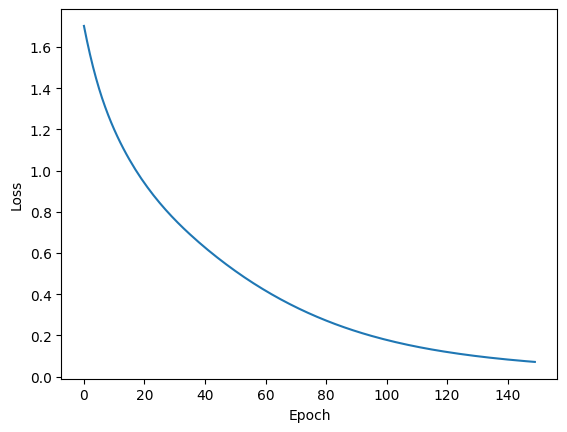

In [11]:
# Plot in here
# Plot the loss values

plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Testing
After training, test your model on test dataset and compute performance metrics.

Accuracy: 0.9457
Precision: 0.7273
Recall: 0.7059
F1 Score: 0.7164
AUC-ROC: 0.8387


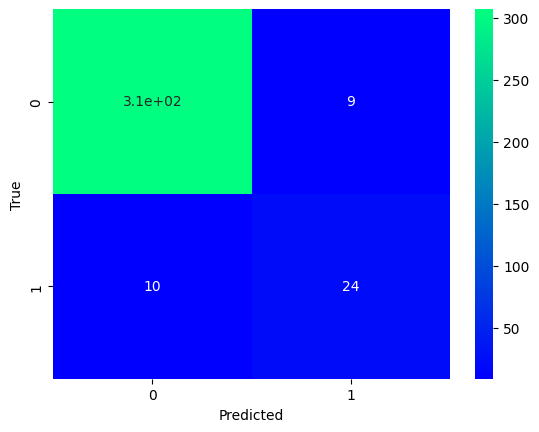

In [12]:
# Implement Test in here

model.eval()
with torch.no_grad():
  outputs = model(torch.Tensor(validation_pca)).squeeze()
  preds = torch.round(torch.sigmoid(outputs))
  cm = confusion_matrix(validation_labels.numpy(), preds.numpy())
  accuracy = accuracy_score(validation_labels.numpy(), preds.numpy())
  precision = precision_score(validation_labels.numpy(), preds.numpy())
  recall = recall_score(validation_labels.numpy(), preds.numpy())
  f1 = f1_score(validation_labels.numpy(), preds.numpy())
  auc_roc = roc_auc_score(validation_labels.numpy(), preds.numpy())

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

# Drawing Confusion Matrix for Training set
sns.heatmap(cm, annot=True, cmap='winter')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Show confusion matrix of your model.